In [128]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.metrics import mean_absolute_error,r2_score,root_mean_squared_error

## Data ingestion and exploration

In [11]:
import os
os.getcwd()

'c:\\Users\\HP\\Desktop\\ML Projects\\mle2eproject\\notebook'

In [13]:
stud_df=pd.read_csv("data//stud.csv")

In [17]:
stud_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## EDA 
##### 1. Describe the data
##### 2. Check for null values
##### 3. Check for duplicates
##### 4. Feature Engineering
##### 5. Explore the data using Univariate Analysis
##### 6. Use Bivariate analysis
##### 7. Develop correlated heat map 


In [21]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### There are no null values in our data set

In [20]:
stud_df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [22]:
stud_df.duplicated().sum()

np.int64(0)

There are no duplicates in our data

In [23]:
stud_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [32]:
[print(cols,stud_df[cols].nunique(),stud_df[cols].unique()) for cols in stud_df.select_dtypes(include='object').columns]

gender 2 ['female' 'male']
race_ethnicity 5 ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education 6 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch 2 ['standard' 'free/reduced']
test_preparation_course 2 ['none' 'completed']


[None, None, None, None, None]

In [34]:
stud_df['Total_Sore']=stud_df['math_score']+stud_df['reading_score']+stud_df['writing_score']

In [35]:
stud_df['Average_Score']=stud_df['Total_Sore']/3

In [36]:
stud_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Sore,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


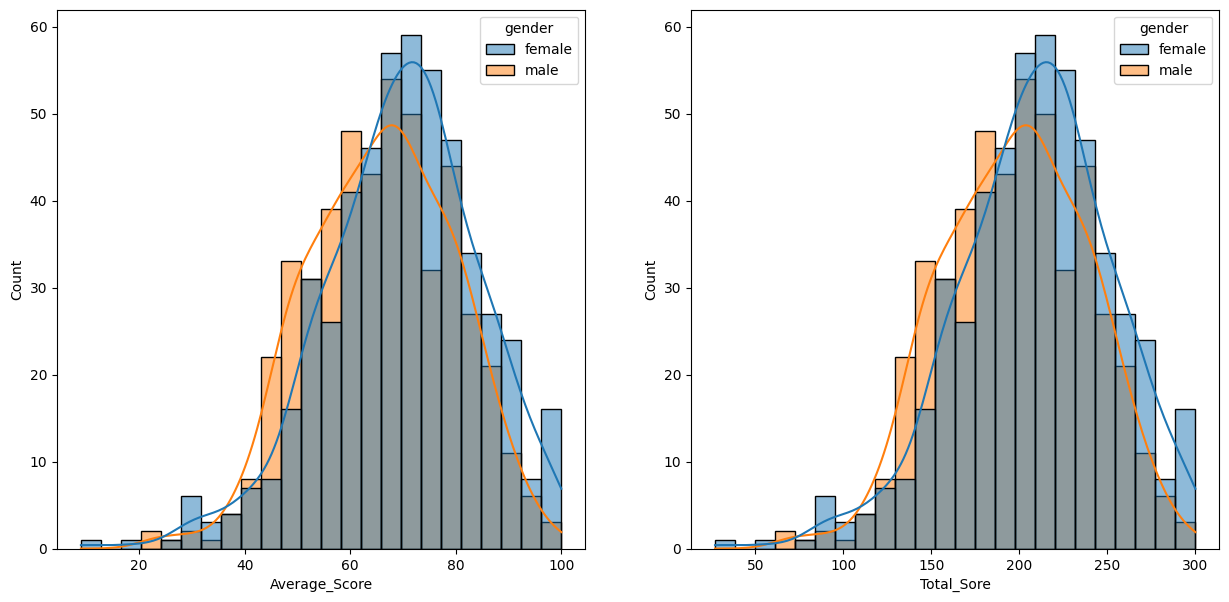

In [39]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=stud_df,x='Average_Score',hue='gender',kde=True)
plt.subplot(122)
sns.histplot(data=stud_df,x='Total_Sore',hue='gender',kde=True)
plt.show()



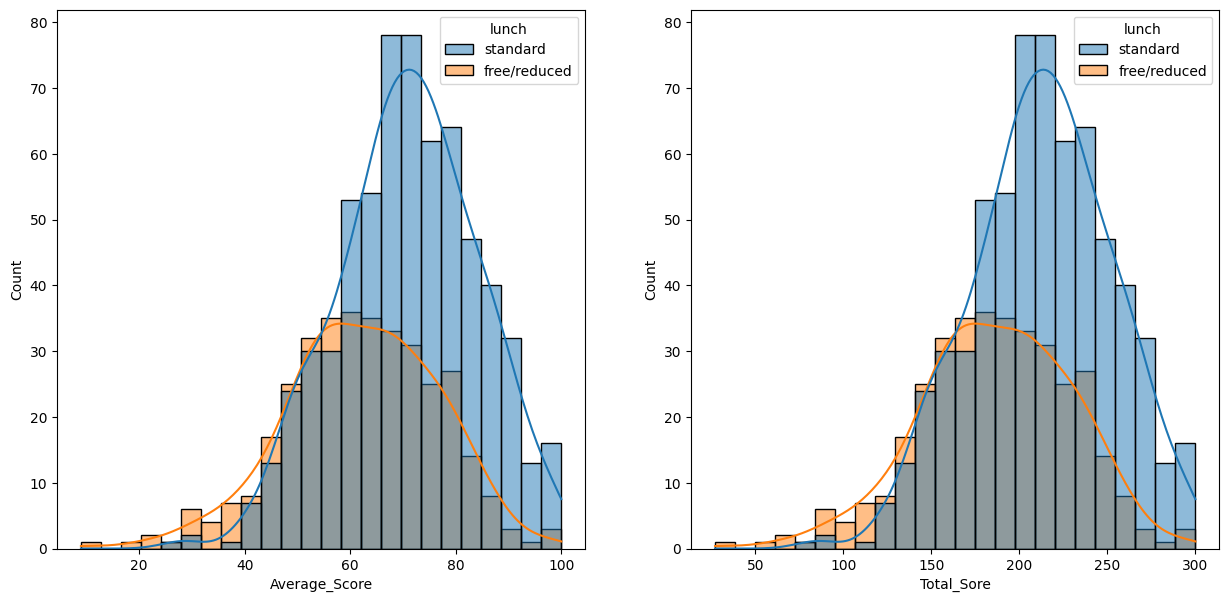

In [40]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=stud_df,x='Average_Score',hue='lunch',kde=True)
plt.subplot(122)
sns.histplot(data=stud_df,x='Total_Sore',hue='lunch',kde=True)
plt.show()

<Axes: xlabel='test_preparation_course', ylabel='writing_score'>

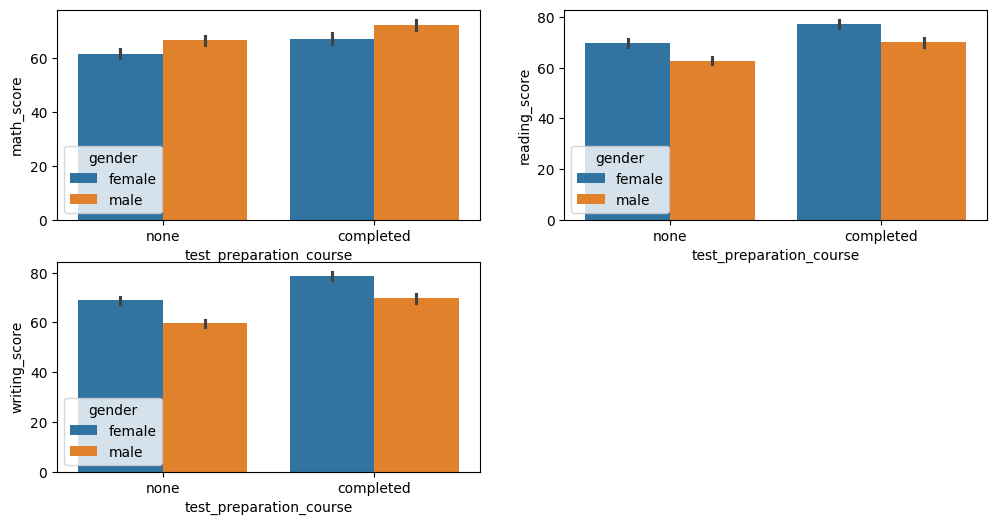

In [98]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=stud_df['test_preparation_course'], y=stud_df['math_score'], hue=stud_df['gender'])
plt.subplot(2,2,2)
sns.barplot (x=stud_df['test_preparation_course'], y=stud_df['reading_score'], hue=stud_df['gender'])
plt.subplot(2,2,3)
sns.barplot (x=stud_df['test_preparation_course'], y=stud_df['writing_score'], hue=stud_df['gender'])

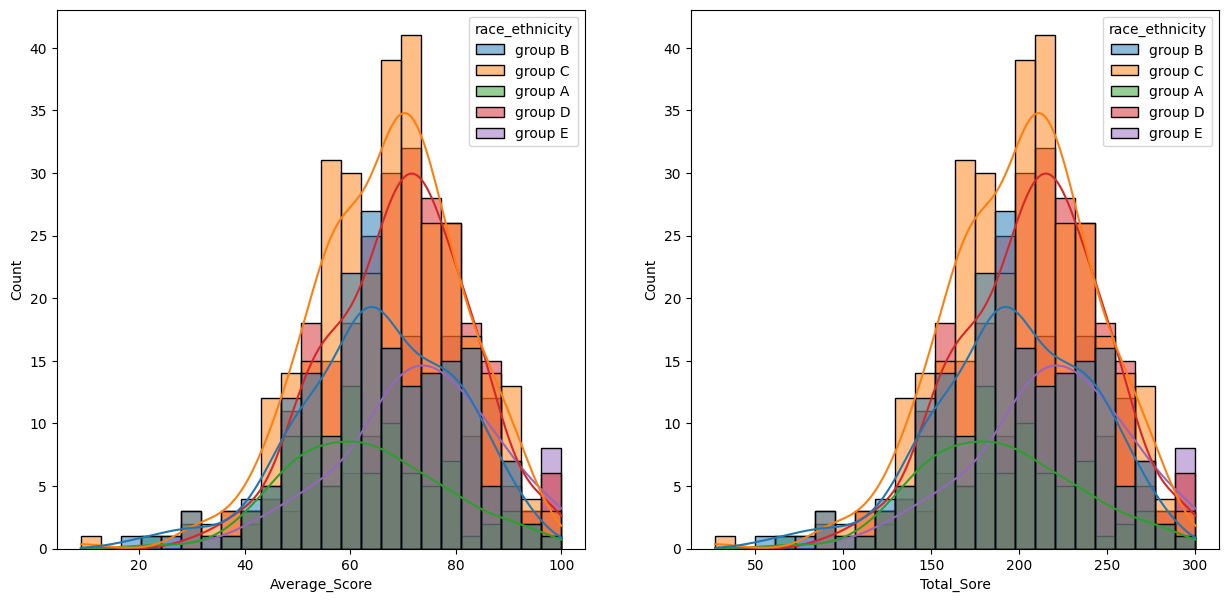

In [43]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=stud_df,x='Average_Score',hue='race_ethnicity',kde=True)
plt.subplot(122)
sns.histplot(data=stud_df,x='Total_Sore',hue='race_ethnicity',kde=True)
plt.show()

In [48]:
stud_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Sore,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [53]:
std_gp=stud_df.groupby(['race_ethnicity','gender']).agg({'Average_Score':'mean'}).reset_index()

In [54]:
std_gp

,race_ethnicity,gender,Average_Score
0,group A,female,65.129630
1,group A,male,61.540881
2,group B,female,67.509615
3,group B,male,63.000000
4,group C,female,68.585185
5,group C,male,65.249400
6,group D,female,71.439276
7,group D,male,66.987469
8,group E,female,74.062802
9,group E,male,71.478873


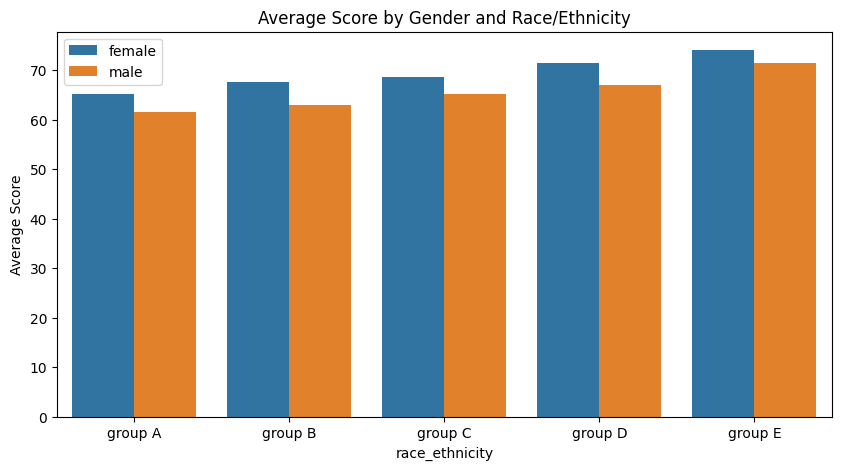

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=std_gp,
    x='race_ethnicity', y='Average_Score',
    hue='gender'
)
plt.title("Average Score by Gender and Race/Ethnicity")
plt.ylabel("Average Score")
plt.legend()
plt.show()

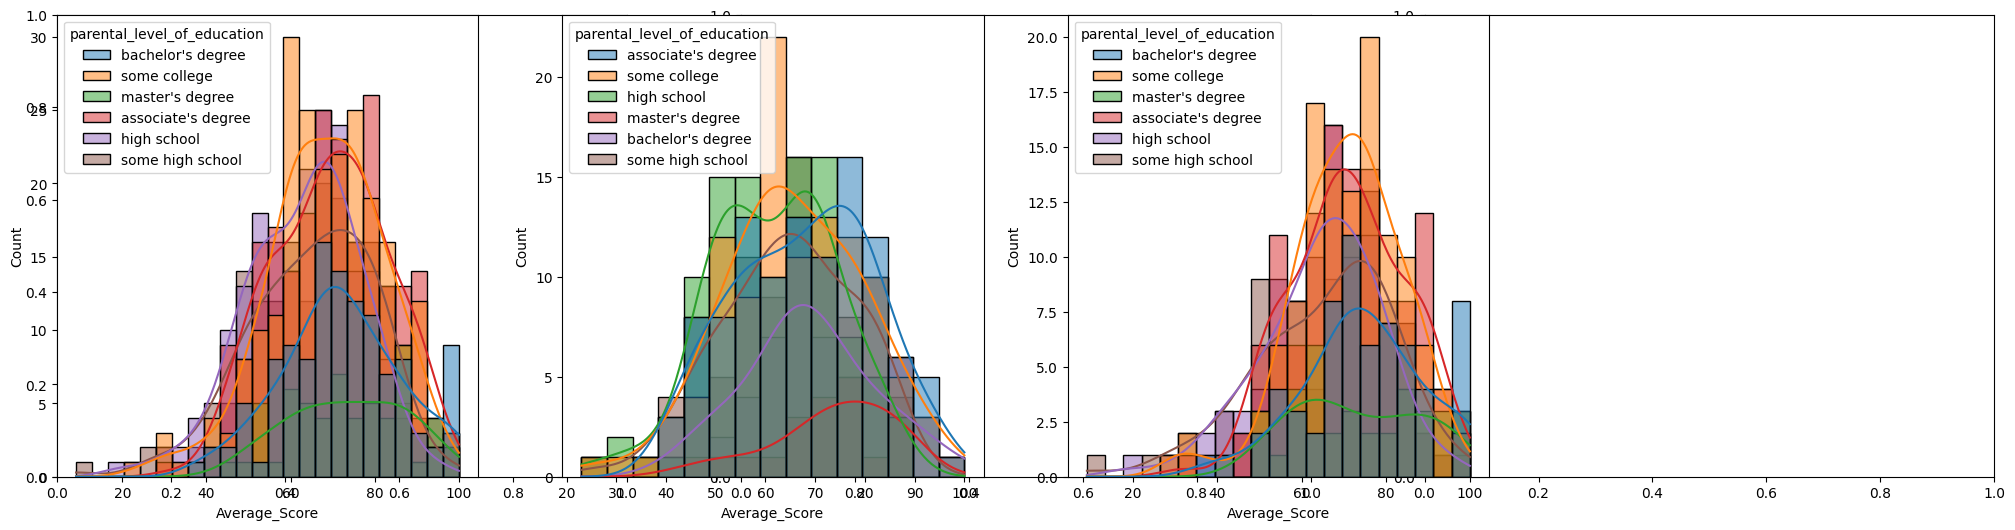

In [60]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=stud_df,x='Average_Score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=stud_df[stud_df.gender=='male'],x='Average_Score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=stud_df[stud_df.gender=='female'],x='Average_Score',kde=True,hue='parental_level_of_education')
plt.show()

In [61]:
stud_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Sore,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='writing_score'>

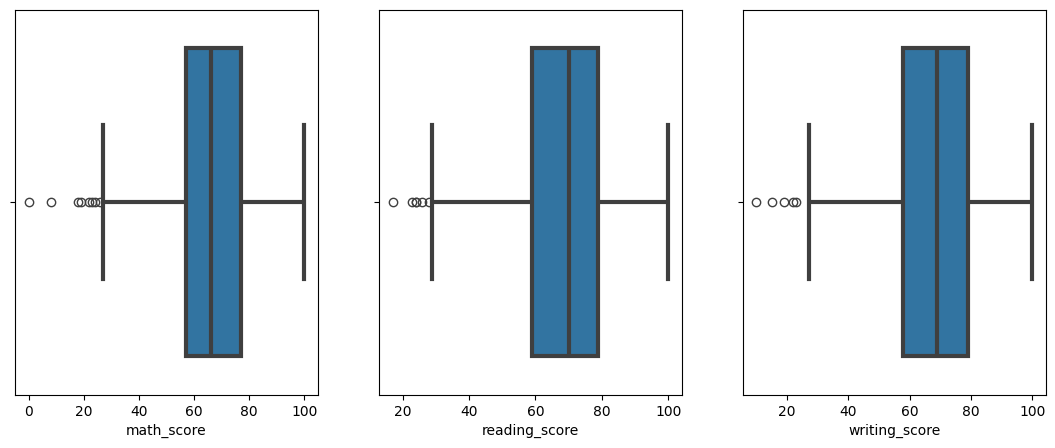

In [70]:
plt.figure(figsize=(18,5))
plt.subplot(1,4,1)
sns.boxplot(data=stud_df,x='math_score',linewidth=3)
plt.subplot(1,4,2)
sns.boxplot(data=stud_df,x='reading_score',linewidth=3)
plt.subplot(1,4,3)
sns.boxplot(data=stud_df,x='writing_score',linewidth=3)

In [71]:
[print(cols,stud_df[cols].nunique(),stud_df[cols].unique()) for cols in stud_df.select_dtypes(include='object').columns]

gender 2 ['female' 'male']
race_ethnicity 5 ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education 6 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch 2 ['standard' 'free/reduced']
test_preparation_course 2 ['none' 'completed']


[None, None, None, None, None]

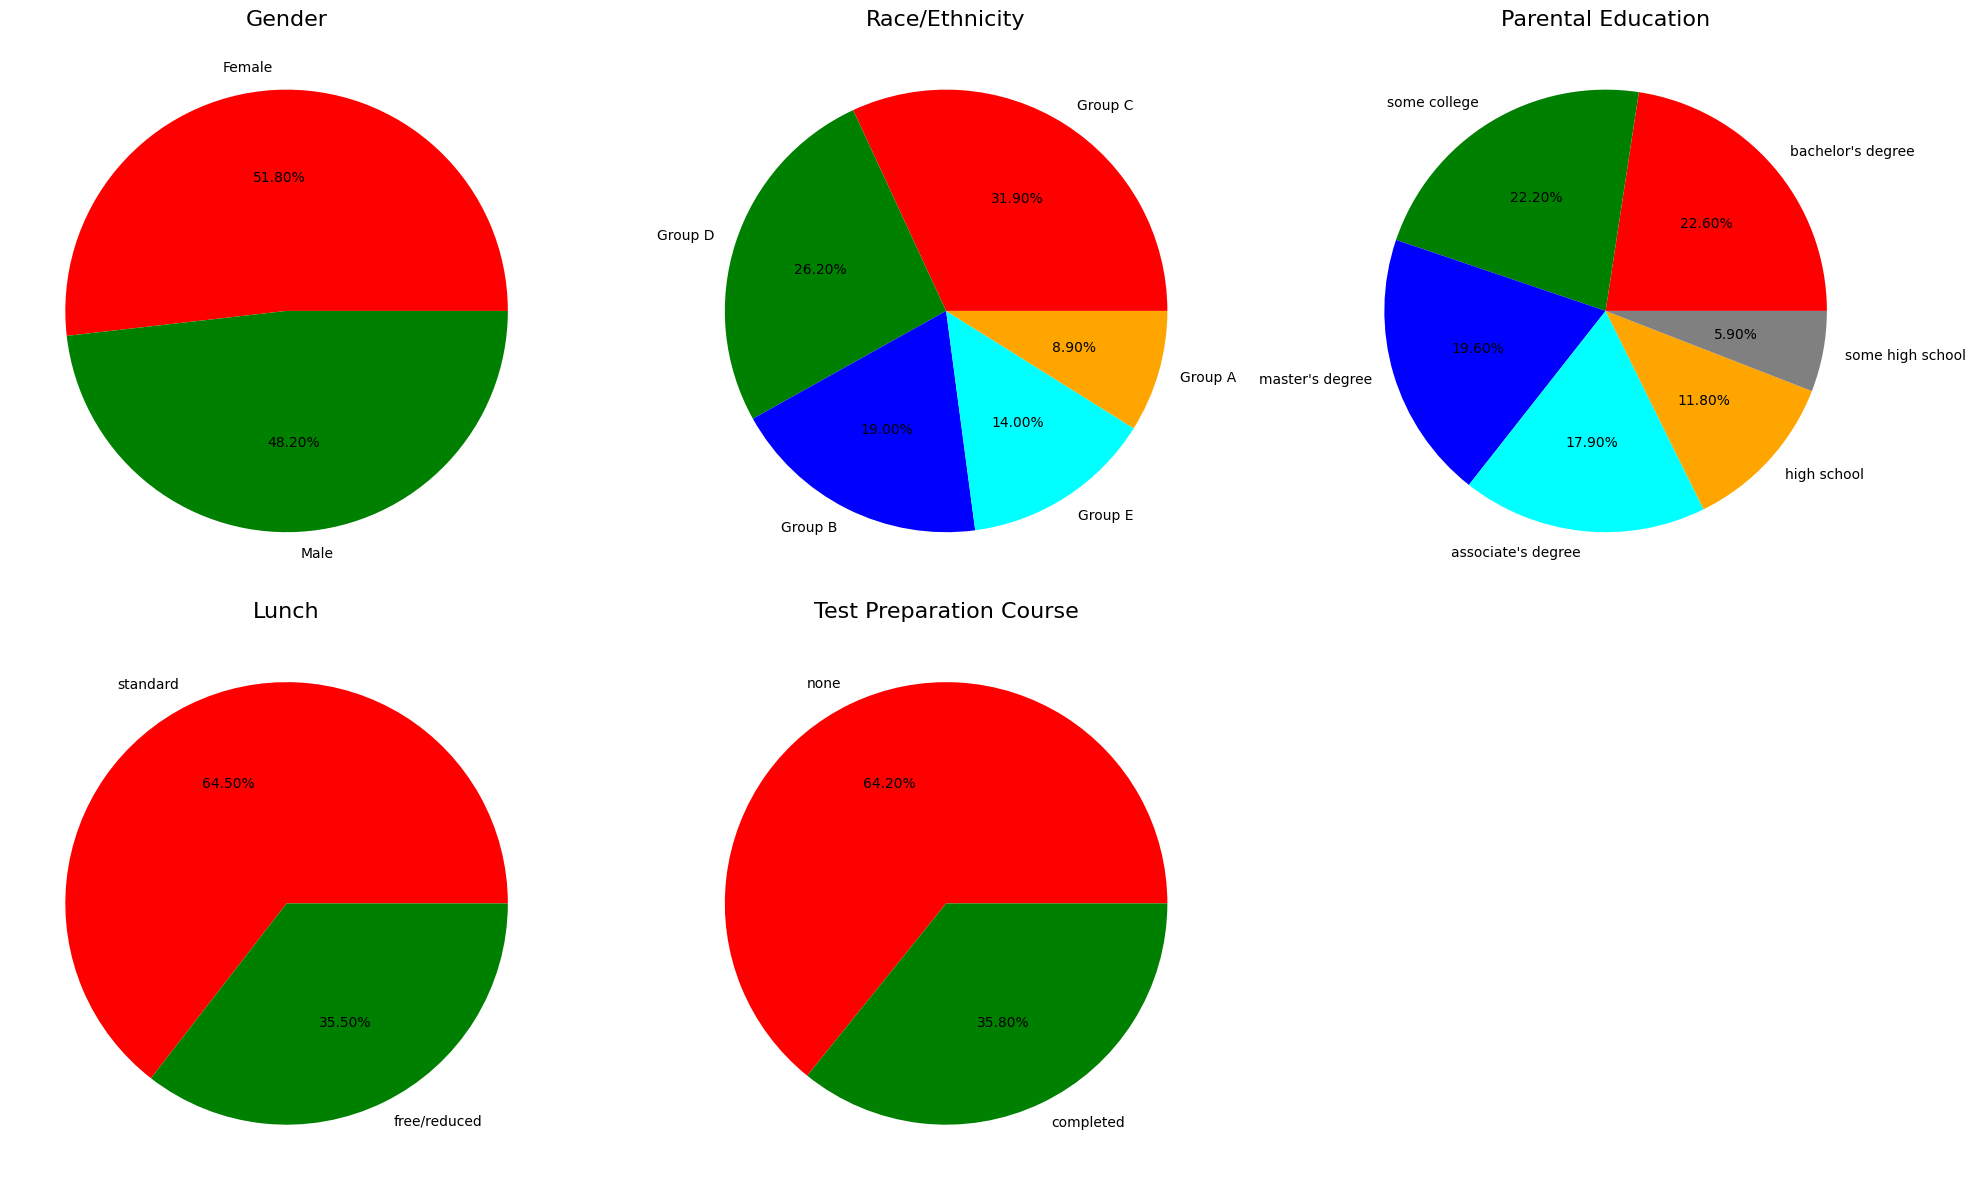

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))

# 1. Gender
plt.subplot(2,3,1)
size = stud_df['gender'].value_counts()
labels = ['Female','Male']
colors = ['red','green']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Gender', fontsize=16)
plt.axis('off')

# 2. Race/Ethnicity
plt.subplot(2,3,2)
size = stud_df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D','Group B','Group E','Group A']
colors = ['red','green','blue','cyan','orange']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Race/Ethnicity', fontsize=16)
plt.axis('off')

# 3. Parental Education
plt.subplot(2,3,3)
size = stud_df['parental_level_of_education'].value_counts()
labels = ["bachelor's degree","some college","master's degree",
          "associate's degree","high school","some high school"]
colors = ['red','green','blue','cyan','orange','grey']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Parental Education', fontsize=16)
plt.axis('off')

# 4. Lunch
plt.subplot(2,3,4)
size = stud_df['lunch'].value_counts()
labels = ["standard","free/reduced"]
colors = ['red','green']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Lunch', fontsize=16)
plt.axis('off')

# 5. Test Preparation Course
plt.subplot(2,3,5)
size = stud_df['test_preparation_course'].value_counts()
labels = ["none","completed"]
colors = ['red','green']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Test Preparation Course', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()


In [86]:
std_gp2=stud_df.groupby('gender').agg({'math_score': 'mean',
                                                          'reading_score': 'mean',
                                                          'writing_score': 'mean',}).reset_index()

In [87]:
std_gp2

,gender,math_score,reading_score,writing_score
0,female,63.633205,72.608108,72.467181
1,male,68.728216,65.473029,63.311203


In [92]:
std_gp2=std_gp2.melt(id_vars='gender',value_vars=['math_score','reading_score','writing_score'],
             var_name='Subject',value_name='Score')

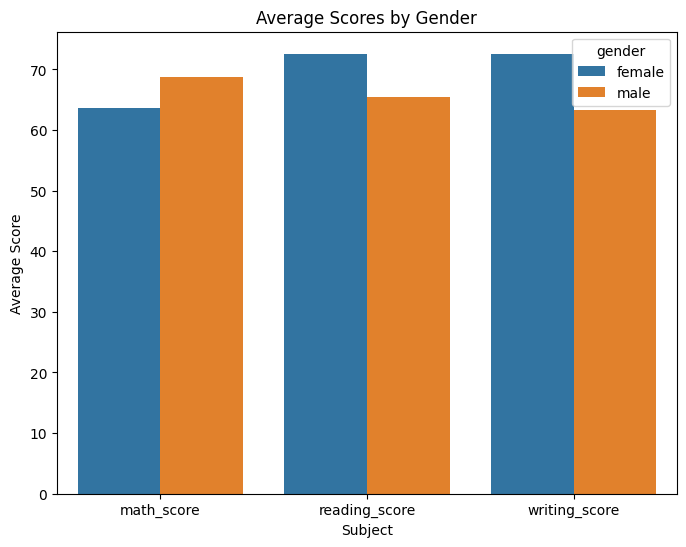

In [93]:
plt.figure(figsize=(8,6))
sns.barplot(data=std_gp2, x='Subject', y='Score', hue='gender')
plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.show()

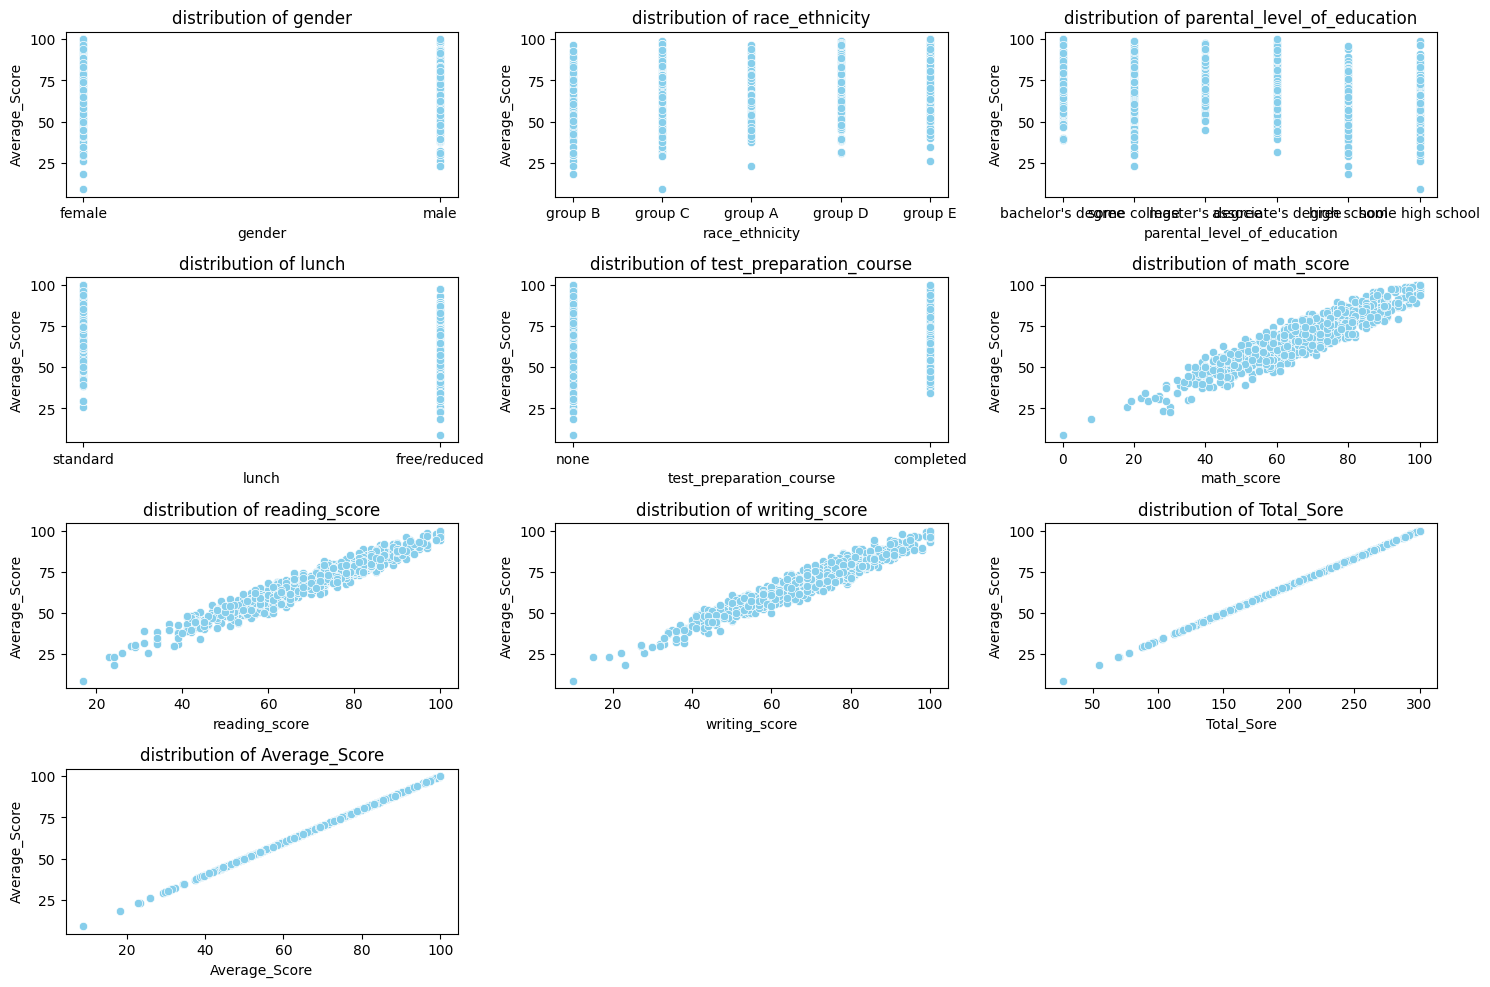

In [77]:
plt.figure(figsize=(15,12))

for i,col in enumerate(stud_df.columns,1):
    plt.subplot(len(stud_df.columns)//3+2,3,i)
    sns.scatterplot(x=stud_df[col],y=stud_df['Average_Score'],c='skyblue')
    plt.title(f'distribution of {col}')
    plt.tight_layout()
plt.show()

## Baseline Model

In [114]:
##split the data --> train,temp
## split inot --> train,test,validation
## transfomr the data


df_train,df_temp=train_test_split(stud_df,train_size=0.6,random_state=42)
df_valid,df_test=train_test_split(df_temp,test_size=0.5,random_state=42)

X_train= df_train.drop(columns=['Total_Sore','Average_Score','math_score'])
y_train=df_train['math_score']

X_valid=df_valid.drop(columns=['Total_Sore','Average_Score','math_score'])
y_valid=df_valid['math_score']

X_test=df_test.drop(columns=['Total_Sore','Average_Score','math_score'])
y_test=df_test['math_score']


###transform the data

numeric_cols=X_train.select_dtypes(exclude='O').columns.to_list()
cat_cols=X_train.select_dtypes(include='O').columns.to_list()

num_transformer=make_pipeline(SimpleImputer(strategy='mean'),StandardScaler())
cat_transformer=make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder())

feature_transformer=ColumnTransformer(
    transformers=[('num',num_transformer,numeric_cols),
                  ('cat',cat_transformer,cat_cols)]
)


X_train=feature_transformer.fit_transform(X_train)
X_valid=feature_transformer.transform(X_valid)
X_test=feature_transformer.transform(X_test)


In [130]:
def evaluate(actual,predicted):
    mae=mean_absolute_error(actual,predicted)
    rmse=root_mean_squared_error(actual,predicted)
    r2=r2_score(actual,predicted)

    return mae,rmse,r2

In [135]:
models={
    'XGBOOSTR':XGBRegressor(),
    'LinearRegression':LinearRegression(),
    'RDF':RandomForestRegressor(),
    'ADABOOST':AdaBoostRegressor(),
    'SVR':SVR(),
    'CatBoostRegressor':CatBoostRegressor(),
    'KNB':KNeighborsRegressor(),
    'DTR':DecisionTreeRegressor()
    
}

model_list=[]
model_dict={}


for i in range(len(list(models))):
    model=list(models.values())[i]
    model_list.append(list(models.keys())[i])
    model_name=list(models.keys())[i]

    model.fit(X_train,y_train)

    #make predictions
    y_train_pred=model.predict(X_train)
    y_valid_pred=model.predict(X_valid)

    ##evaluate model
    train_mae,train_rmse,train_r2=evaluate(y_train,y_train_pred)
    valid_mae,valid_rmse,valid_r2=evaluate(y_valid,y_valid_pred)

    model_dict[model_name] = {
        'Valid_RMSE': round(valid_rmse, 4),
        'Valid_MAE': round(valid_mae, 4),
        'Valid_R2': round(valid_r2, 4)
    }

    print(list(models.keys())[i])

    print ('Model performance on training dataset')
    print(f'- Root Mean Squared Error: {train_rmse:.4f}')
    print(f'- Mean Absolute Error: {train_mae:.4f}')
    print(f'- Root 2 Score: {train_r2:.4f}')
    

    print('---------------------------------------')

    print ('Model performance on Valid dataset')
    print(f'- Root Mean Squared Error: {valid_rmse:.4f}')
    print(f'- Mean Absolute Error: {valid_mae:.4f}')
    print(f'- Root 2 Score: {valid_r2:.4f}')
    

    print('='*35)
    print('\n')


    


    

XGBOOSTR
Model performance on training dataset
- Root Mean Squared Error: 0.5980
- Mean Absolute Error: 0.4015
- Root 2 Score: 0.9984
---------------------------------------
Model performance on Valid dataset
- Root Mean Squared Error: 6.5770
- Mean Absolute Error: 5.2391
- Root 2 Score: 0.8020


LinearRegression
Model performance on training dataset
- Root Mean Squared Error: 5.2038
- Mean Absolute Error: 4.1634
- Root 2 Score: 0.8780
---------------------------------------
Model performance on Valid dataset
- Root Mean Squared Error: 5.5906
- Mean Absolute Error: 4.5296
- Root 2 Score: 0.8569


RDF
Model performance on training dataset
- Root Mean Squared Error: 2.3451
- Mean Absolute Error: 1.8451
- Root 2 Score: 0.9752
---------------------------------------
Model performance on Valid dataset
- Root Mean Squared Error: 6.1787
- Mean Absolute Error: 4.9792
- Root 2 Score: 0.8253


ADABOOST
Model performance on training dataset
- Root Mean Squared Error: 5.7740
- Mean Absolute Error:

In [139]:
DataFrame(model_dict).T.sort_values(by='Valid_R2',ascending=False)

,Valid_RMSE,Valid_MAE,Valid_R2
LinearRegression,5.5906,4.5296,0.8569
CatBoostRegressor,5.9399,4.7753,0.8385
RDF,6.1787,4.9792,0.8253
ADABOOST,6.5638,5.3691,0.8028
XGBOOSTR,6.5770,5.2391,0.8020
KNB,7.0101,5.6000,0.7751
SVR,7.4802,5.6199,0.7439
DTR,7.6056,6.0450,0.7352


### fuction for ingestion, standerdization  snd splitting
